## Estudo: Análise Temporal Netflix

# Objetivo

O objetivo deste estudo é realizar uma análise exploratória e temporal de dados do dataset "Netflix Movies and TV Shows" disponível no [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows).

# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from wordcloud import WordCloud

In [2]:
# Importação dos dados
netdf = pd.read_csv('https://raw.githubusercontent.com/digonfernan/analise-temporal-netflix/main/netflix_titles.csv')

In [3]:
# Visualização inicial do dataset
display(netdf.shape)
display(netdf.head())
display(netdf.tail())

(8807, 12)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Preparação dos dados

In [4]:
# Verificação da ausência de valores
netdf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Verifica-se a ausência de valores, portanto é necessário tratamento
# A maioria se encontra nas colunas "director", "country" e "cast"
# Esses NaN values serão substituidos por "No Data" e o restando será removido

# Substituição NaN
netdf['director'].replace(np.nan, 'No Data',inplace  = True)
netdf['country'].replace(np.nan, 'No Data',inplace  = True)
netdf['cast'].replace(np.nan, 'No Data',inplace  = True)

# Remoção NaN restantes
netdf.dropna(inplace=True)

In [6]:
# Verificação da ausência de valores
netdf.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
# Para realizar a análise temporal, é necessário ajustar os dados para trabalhar melhor as visualizações
netdf["date_added"] = pd.to_datetime(netdf['date_added'])

netdf['year_added'] = netdf['date_added'].dt.year
netdf['month_added']=netdf['date_added'].dt.month
netdf['month_name_added']=netdf['date_added'].dt.month_name()
netdf['day_added']=netdf['date_added'].dt.day

# Visualização
display(netdf.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September,25
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,September,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,September,24
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,September,24
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,September,24


In [8]:
# Reorganização das colunas para facilitar o entendimento
netdf = netdf[['show_id',
         'type',
         'title',
         'director',
         'cast',
         'country',
         'rating',
         'duration',
         'listed_in',
         'description',
         'release_year',
         'date_added',      
         'year_added',
         'month_added',
         'month_name_added',
         'day_added']]

# Visualização
display(netdf.head())

,show_id,type,title,director,cast,country,rating,duration,listed_in,description,release_year,date_added,year_added,month_added,month_name_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020,2021-09-25,2021,9,September,25
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2021-09-24,2021,9,September,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,2021-09-24,2021,9,September,24
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,2021-09-24,2021,9,September,24
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2021-09-24,2021,9,September,24


# EDA

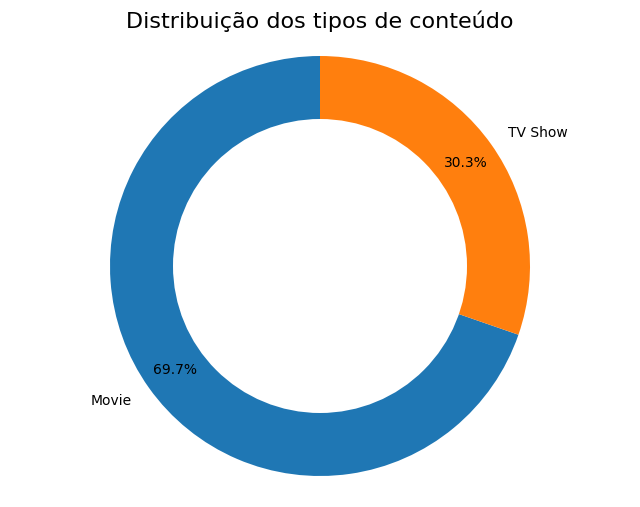

In [9]:
# Tipo de conteúdo
# Contagem
type_counts = netdf['type'].value_counts()

# Cria o gráfico donut
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Distribuição dos tipos de conteúdo', fontsize=16)

# Mostra o gráfico
plt.show()

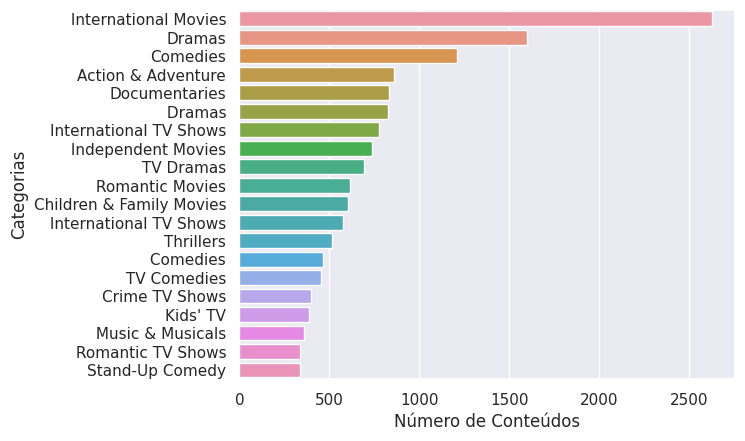

In [10]:
# As 10 maiores categorias de conteúdo
# Contabiliza o número de counteúdos em cada categoria e armazena no dataframe 'category_count'
category_count = netdf['listed_in'].str.split(',', expand=True).stack().value_counts()

# Seleciona as 20 principais categorias
top_20_categories = category_count.nlargest(20)

# Cria o gráfico de barras horizontal
sns.set(style='darkgrid')
ax = sns.barplot(x=top_20_categories, y=top_20_categories.index, orient='h')

# Define os rótulos dos eixos
ax.set(xlabel='Número de Conteúdos', ylabel='Categorias')

# Mostra o gráfico
plt.show()

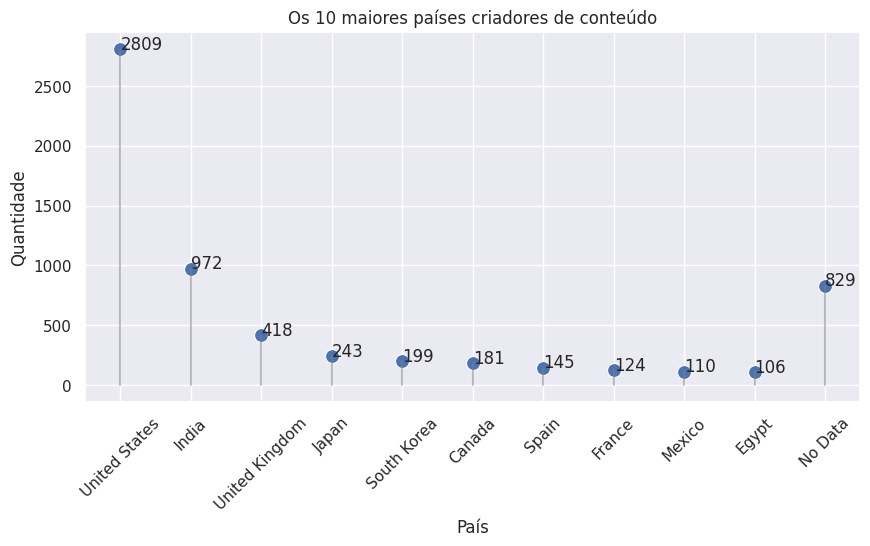

In [11]:
# Os 10 maiores países criadores de conteúdo
# O valor "No Data" será mantido na visualização para demonstrar a quantidade em relação ao total, mostrando no total de 11 linhas, sendo 10 países e 1 do "No Data"
# Contagem
country_counts = netdf['country'].value_counts()

# Seleciona os 10 maiores valores
top_countries = country_counts[:11]

# Verifica se 'No Data' está na lista de top_countries
if 'No Data' in top_countries.index:
    # Remova 'No Data' da lista e adicione no final
    top_countries = top_countries.drop('No Data')
    top_countries['No Data'] = country_counts['No Data']

# Cria uma figura com uma única subparcela
fig, ax = plt.subplots()

# Cria o gráfico lollipop
sns.scatterplot(y=top_countries.values, x=top_countries.index, ax=ax, s=100)

# Adiciona linhas horizontais ligando a linha do eixo y aos pontos do eixo x
for i, v in enumerate(top_countries.values):
    ax.plot([top_countries.index[i], top_countries.index[i]], [v, 0], color='gray', alpha=0.5)

# Adiciona rótulos ao topo das linhas horizontais
for i, v in enumerate(top_countries.values):
    ax.text(top_countries.index[i], v, str(v))

# Adiciona rótulos de eixos e título
ax.set_xlabel('País')
ax.set_ylabel('Quantidade')
ax.set_title('Os 10 maiores países criadores de conteúdo')

# Ajusta a largura da figura para melhor visualização
fig.set_figwidth(10)

# Gira os rótulos do eixo x em 45 graus para melhorar a legibilidade
ax.xaxis.set_tick_params(rotation=45)

# Mostra o gráfico
plt.show()

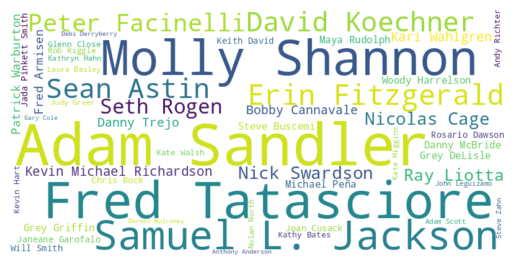

In [12]:
# Os atores mais participativos do United States
# Remova os valores "No Data" da coluna 'cast'
netdf = netdf[netdf['cast'] != 'No Data']

# Seleciona apenas os atores dos Estados Unidos
us_cast_df = netdf[netdf['country'] == 'United States']

# Conta o número de filmes para cada ator e armazena no dataframe 'cast_count'
cast_count = us_cast_df['cast'].str.split(',', expand=True).stack().value_counts()

# Seleciona os 50 atores com mais filmes
top_10_cast = cast_count.nlargest(50)

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_cast)

# Mostra o gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Análise Temporal

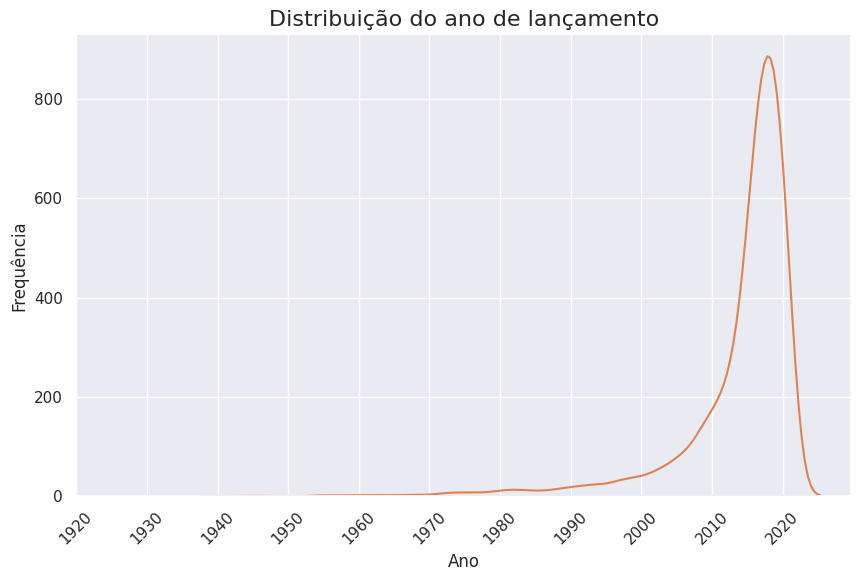

In [13]:
# Plot do ano de lançamento do conteúdo
# Cria uma figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(10,6))

# Calcula os valores da densidade
kde_vals = sns.kdeplot(data=netdf, x='release_year').get_lines()[0].get_data()

# Multiplica os valores da densidade pelo número total de amostras para obter a frequência de vezes
freq_vals = kde_vals[1] * len(netdf)

# Plota os valores da frequência em um gráfico de linha
ax.plot(kde_vals[0], freq_vals)

# Adiciona um título e rótulos de eixo
ax.set_title('Distribuição do ano de lançamento', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Define os valores dos intervalos do eixo x
ax.set_xticks(range(1920, 2023, 10))

# Gira os rótulos do eixo x em 45 graus para melhorar a legibilidade
ax.xaxis.set_tick_params(rotation=45)

# Mostra o gráfico
plt.show()

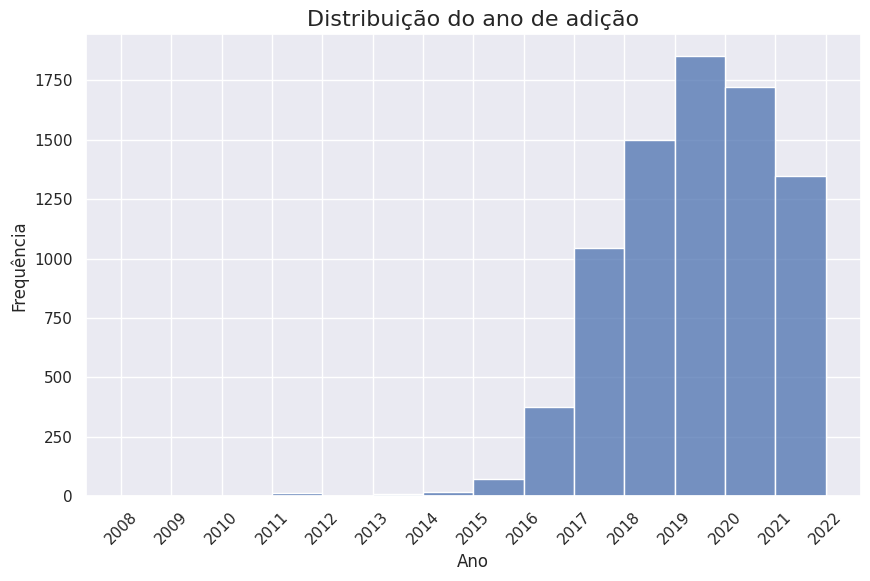

In [14]:
# Adição de conteúdo ao longo dos anos
# Cria uma figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(10,6))

# Cria um histograma
sns.histplot(data=netdf, x='year_added', kde=False, bins=range(2008, 2023), ax=ax)

# Adiciona um título e rótulos de eixo
ax.set_title('Distribuição do ano de adição', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Define os valores dos intervalos do eixo x
ax.set_xticks(range(2008, 2023, 1))

# Gira os rótulos do eixo x em 45 graus para melhorar a legibilidade
ax.xaxis.set_tick_params(rotation=45)

# Mostra o gráfico
plt.show()

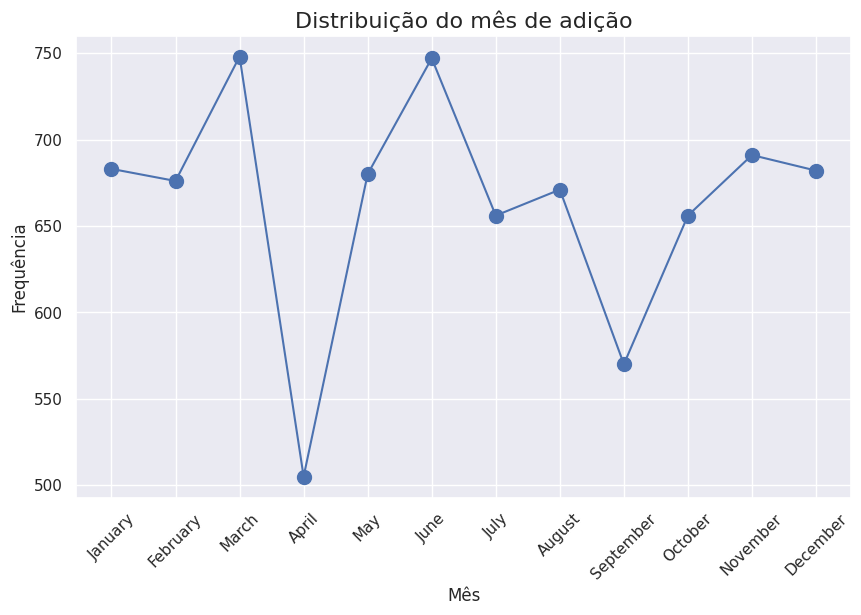

In [15]:
# Adição de conteúdo ao longo dos meses
# Cria uma figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(10,6))

# Cria uma lista com os nomes dos meses em ordem cronológica
meses_ordem_cronologica = list(calendar.month_name[1:])

# Cria o connected scatter plot
plt.plot(meses_ordem_cronologica, netdf.groupby('month_name_added').size(), 'o-', markersize=10)

# Adiciona um título e rótulos de eixo
ax.set_title('Distribuição do mês de adição', fontsize=16)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Gira os rótulos do eixo x em 45 graus para melhorar a legibilidade
ax.xaxis.set_tick_params(rotation=45)

# Mostra o gráfico
plt.show()

Text(46.24999999999999, 0.5, 'Meses adicionados')

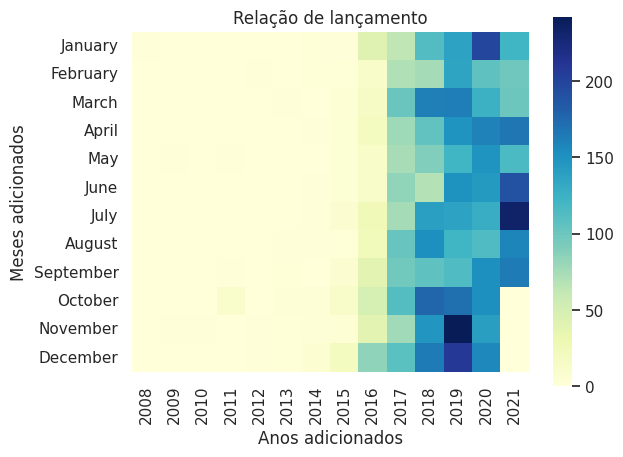

In [16]:
# Relação de lançamento durante os meses ao longo dos anos
# Cria uma lista e prepara o dataset com os nomes dos meses em ordem cronológica
month_order = [calendar.month_name[i] for i in range(1, 13)]
netdf['month_name_added'] = pd.Categorical(netdf['month_name_added'], categories=month_order, ordered=True)

# Cria uma tabela dinâmica
pivot_table = pd.pivot_table(netdf, values='show_id', index='month_name_added', columns='year_added', aggfunc='count')

# Cria gráfico heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')

# Plota o gráfico heatmap
plt.imshow(pivot_table, cmap='YlGnBu')

# Define título e rótulos dos eixos
plt.title("Relação de lançamento")
plt.xlabel("Anos adicionados")
plt.ylabel("Meses adicionados")